In [76]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

# Read Data 

In [77]:
## Loading the dataset
google_data = pd.read_csv("C:/Users/Hp/Downloads/googleplaystore.csv")

In [78]:
## Exploring 
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [79]:
google_data.shape

(10841, 13)

In [80]:
google_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

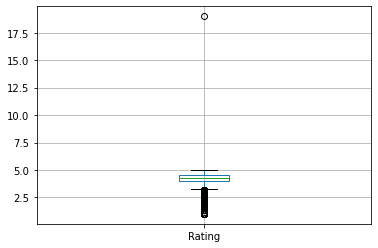

In [81]:
## Create a boxplot & histogram to inspect the distribution of the data and inspect the outliers 
google_data.boxplot()

As it is shown in the boxplot, there is an outlier value reflects a rating score approximately equals to 19, and this rating score is not true (Rating score in this case is from 0 to 5)

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

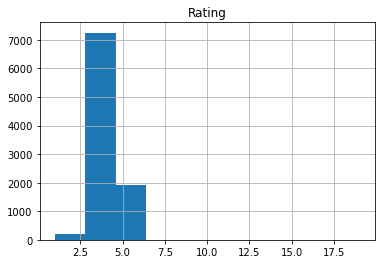

In [82]:
google_data.hist()

In [83]:
## Check the missing values
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data Cleaning 

In [84]:
## Inspecting outliers
google_data[google_data.Rating > 5]  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [85]:
## Dropping outliers
google_data.drop([10472], inplace = True)

<AxesSubplot:>

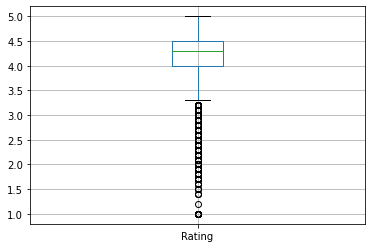

In [86]:
## Look at the distribution after removing outliers
google_data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

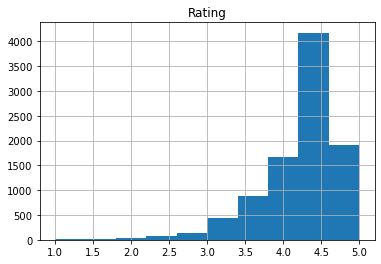

In [87]:
google_data.hist()

According to the histogram, the dataset distribution is left-skewed distribution 

In [88]:
## Check the missing values of each column
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [89]:
## Create a threshold to help in dropping 90% empty rows 
threshold = len(google_data)*0.1 #10% of the rows (10840)
threshold 

1084.0

In [90]:
## Dropping 90% empty rows 
google_data.dropna(thresh = threshold, axis=1, inplace = True)

In [91]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [92]:
google_data.shape

(10840, 13)

# Data Imputation & Manipulation 

In [93]:
## Create a function that will impute median for the missing values 
def impute_median(series):
    return series.fillna(series.median())

In [94]:
## Impute median for the missing values in Rating column
google_data.Rating = google_data['Rating'].transform(impute_median)

In [95]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [96]:
## Fill the missing values in Type, Current Ver, Andorid Ver Columns (because they are categorical) with mode 
google_data['Type'].fillna(str(google_data["Type"].mode().values[0]), inplace = True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace = True)
google_data['Android Ver'].fillna(str(google_data['Android Ver']. mode().values[0]), inplace = True)

In [97]:
## Convert Price, Reviews, and Installs columns into numerical values
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'], errors='coerce')
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

In [98]:
## Take a look at the dataset after cleaning & manipulation
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [99]:
google_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# Data Visualization

In [100]:
## Visualizing & Analyzing Rating, Price, Reviews, and Installs against their respective categories
## Group Rating, Price, Reviews, and Installs against their respective categories to visualize them
grp = google_data.groupby('Category')
Rating = grp['Rating'].agg(np.mean)
Price = grp['Price'].agg(np.sum)
Reviews = grp['Reviews'].agg(np.mean)
Installs = grp["Installs"].agg(np.mean)

In [101]:
print(Rating)
print(Price)
print(Reviews)
print(Installs)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

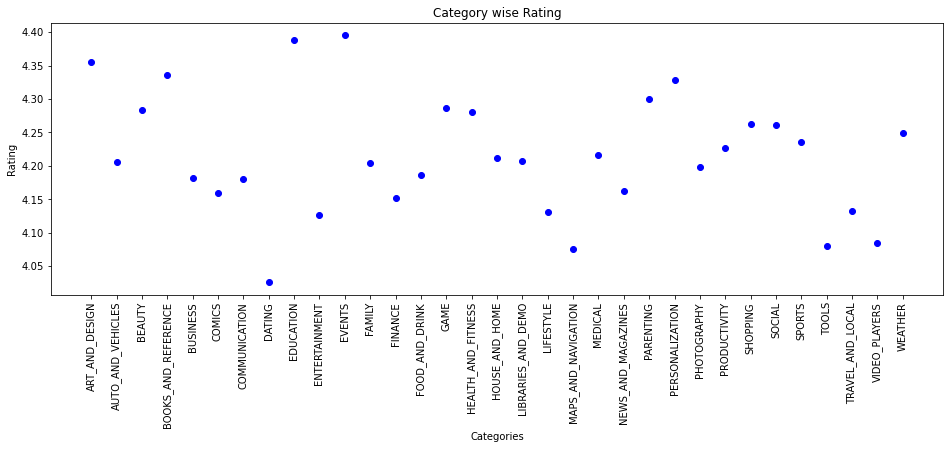

In [102]:
plt.figure(figsize = (16, 5))
plt.plot(Rating, 'bo')
plt.xticks(rotation = 90)
plt.title('Category wise Rating')
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.show()

The graph shows that Education & Event categories have the highest rating and Dating category has the lowest rating 

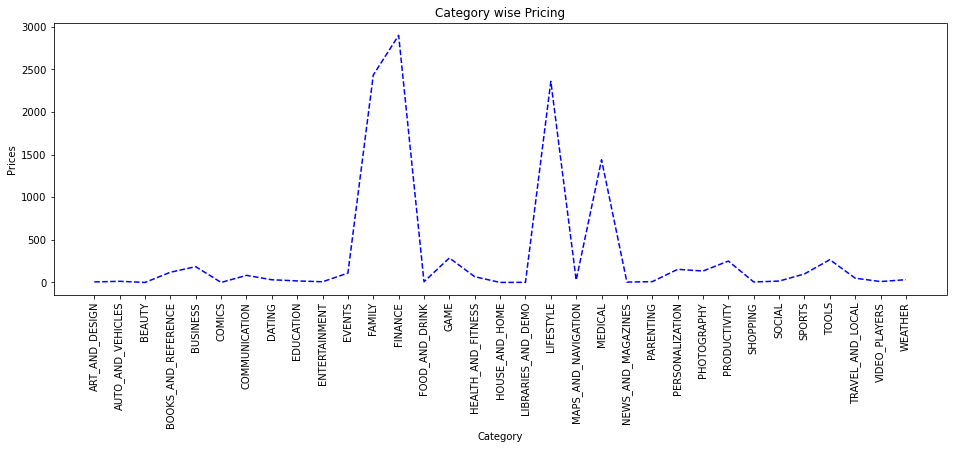

In [103]:
plt.figure(figsize = (16, 5))
plt.plot(Price, 'r--', color = 'b')
plt.xticks(rotation = 90)
plt.title('Category wise Pricing')
plt.xlabel('Category')
plt.ylabel('Prices')
plt.show()

According to the graph, Finance, Family, Lifestyle, and Medical Categories score the highest in terms of price respectively.

<function matplotlib.pyplot.show(close=None, block=None)>

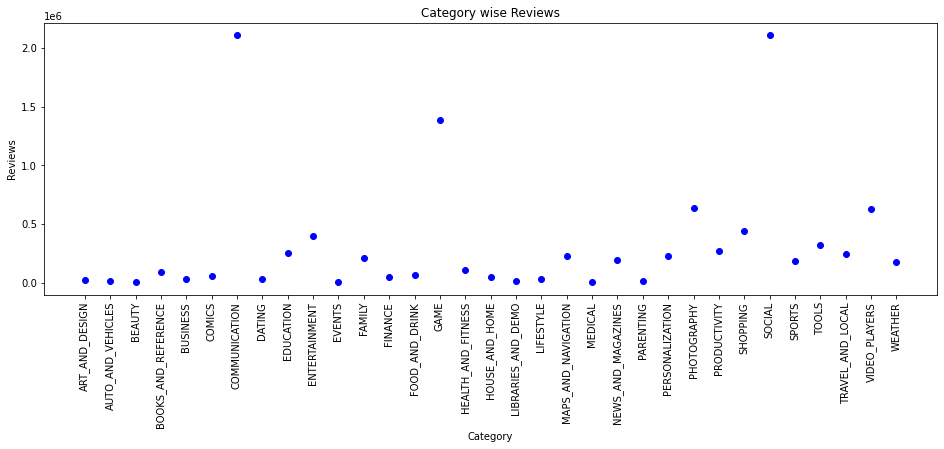

In [104]:
plt.figure(figsize = (16, 5))
plt.plot(Reviews, 'bo')
plt.xticks(rotation = 90)
plt.title('Category wise Reviews')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show

Communication, Social & Game categories score the highest number of reviews 

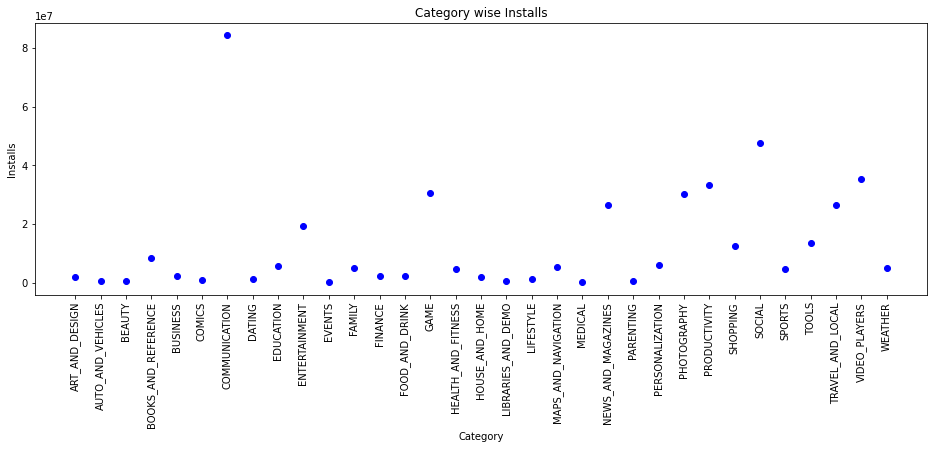

In [105]:
plt.figure(figsize = (16, 5))
plt.plot(Installs, 'bo')
plt.xticks(rotation = 90)
plt.title('Category wise Installs')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.show()

Communication category has the highest number of installs 